# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from statistics import print_p

## Load file and create dataframe

In [2]:
folder = './Data'

files = os.listdir(folder)

csv = 'NASA_TLX_haptics_1.csv'

In [3]:
answers_df = pd.read_csv(os.path.join(folder, csv))

# Separate hardware and simulation experiments
answers_df_hw = answers_df[answers_df['subject number'] >= 100]
answers_df = answers_df[answers_df['subject number'] < 100]

## Separate dataframe depending on interface/run

In [4]:
types = ['remote', 'motion']

# Separate answers depending on interface and run
answers = {}
answers[types[0]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[1]] = answers_df[answers_df['Interface'] == 'Motion']

answers_hw = {}
answers_hw[types[0]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[1]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']

## Separate questions

In [5]:
data = {}
data_hw = {}

mentally_demanding = 'How mentally demanding was the test?'
physically_demanding = 'How physically demanding was the test?'
pace = 'How hurried or rushed was the pace of the task?'
successful = 'How successful were you in accomplishing what you were asked to do?'
insecure = 'How insecure, discouraged, irritated, stresses, and annoyed were you?'

questions = [mentally_demanding, physically_demanding, pace, successful, insecure]

for i in types:
    data[i] = {}
    data_hw[i] = {}
    for q in questions:
        data[i][q] = answers[i][q].values
        data_hw[i][q] = answers_hw[i][q].values

## Compute mean and average

In [6]:
stats = {}
stats_hw = {}

mean_index = 0
std_index = 1

for i in types:
    stats[i] = {}
    stats_hw[i] = {}
    for q in questions:
        stats[i][q] = [0, 0]
        stats[i][q][mean_index] = np.mean(data[i][q])
        stats[i][q][std_index] = np.std(data[i][q])
        
        stats_hw[i][q] = [0, 0]
        stats_hw[i][q][mean_index] = np.mean(data_hw[i][q])
        stats_hw[i][q][std_index] = np.std(data_hw[i][q])
        
print(stats)

{'remote': {'How mentally demanding was the test?': [2.1, 0.9433981132056605], 'How physically demanding was the test?': [1.2, 0.4], 'How hurried or rushed was the pace of the task?': [1.2, 0.4], 'How successful were you in accomplishing what you were asked to do?': [2.8, 0.39999999999999997], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.2, 0.4]}, 'motion': {'How mentally demanding was the test?': [1.7692307692307692, 0.890448992522325], 'How physically demanding was the test?': [1.7692307692307692, 0.890448992522325], 'How hurried or rushed was the pace of the task?': [1.3846153846153846, 0.9230769230769231], 'How successful were you in accomplishing what you were asked to do?': [4.3076923076923075, 0.4615384615384616], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.1538461538461537, 0.36080121229410994]}}


## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

In [7]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

In [8]:
for idx,i in enumerate(types):
    print()
    for j in types[idx+1:]:
        print()
        for q in questions:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones

                t, p = t_test_kruskal(data[i][q],data[j][q])
                print(i,j,q)
                print_p(p)



remote motion How mentally demanding was the test?
p = 0.3718429506435388
remote motion How physically demanding was the test?
p = 0.08515773845882621 !
remote motion How hurried or rushed was the pace of the task?
p = 0.925193293559412
remote motion How successful were you in accomplishing what you were asked to do?
p = 2.008395502848413e-05 !!!!!!!!!!
remote motion How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.7770780701358612



### remote-first motion-first How physically demanding was the test? p =  0.0488888176268915
### remote-last motion-last How physically demanding was the test? p =  0.23390621098854886
### remote-last motion-last How mentally demanding was the test? p =  0.01913961955875495
### motion-first remote-first How mentally demanding was the test? p =  0.03344653009997241

remote
{'How mentally demanding was the test?': [2.1, 0.9433981132056605], 'How physically demanding was the test?': [1.2, 0.4], 'How hurried or rushed was the pace of the task?': [1.2, 0.4], 'How successful were you in accomplishing what you were asked to do?': [2.8, 0.39999999999999997], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.2, 0.4]}
[2.1, 1.2, 1.2, 2.8, 1.2]
[0.9433981132056605, 0.4, 0.4, 0.39999999999999997, 0.4]
motion
{'How mentally demanding was the test?': [1.7692307692307692, 0.890448992522325], 'How physically demanding was the test?': [1.7692307692307692, 0.890448992522325], 'How hurried or rushed was the pace of the task?': [1.3846153846153846, 0.9230769230769231], 'How successful were you in accomplishing what you were asked to do?': [4.3076923076923075, 0.4615384615384616], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.1538461538461537, 0.36080121229410994]}
[1.7692307692307692, 1.7692307692307692, 1.3846

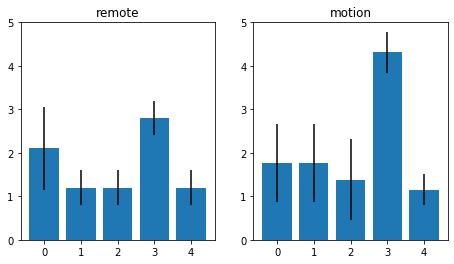

In [12]:
plt.figure(figsize=(16,4))

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
    plt.title(s)
    plt.ylim(0, 5)